## 1.문제 정의

##### 발전기의 주변 환경에 따른 전력 생산량 예측

## 2.데이터 수집

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Power Production.csv')

In [3]:
data.head()
#Ambient Temperature 주변 온도 
#Exhuast Vacuum 배기량
#Ambient Pressure 주변 압력
#Relative Humidity :상대 습도
#Power Production 전력생산량

,Ambient Temperature,Exhuast Vacuum,Ambient Pressure,Relative Humidity,Power Production
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.shape

(9568, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
Ambient Temperature    9568 non-null float64
Exhuast Vacuum         9568 non-null float64
Ambient Pressure       9568 non-null float64
Relative Humidity      9568 non-null float64
Power Production       9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


## 4.EDA

In [6]:
data.corr()

,Ambient Temperature,Exhuast Vacuum,Ambient Pressure,Relative Humidity,Power Production
Ambient Temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhuast Vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient Pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Power Production,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

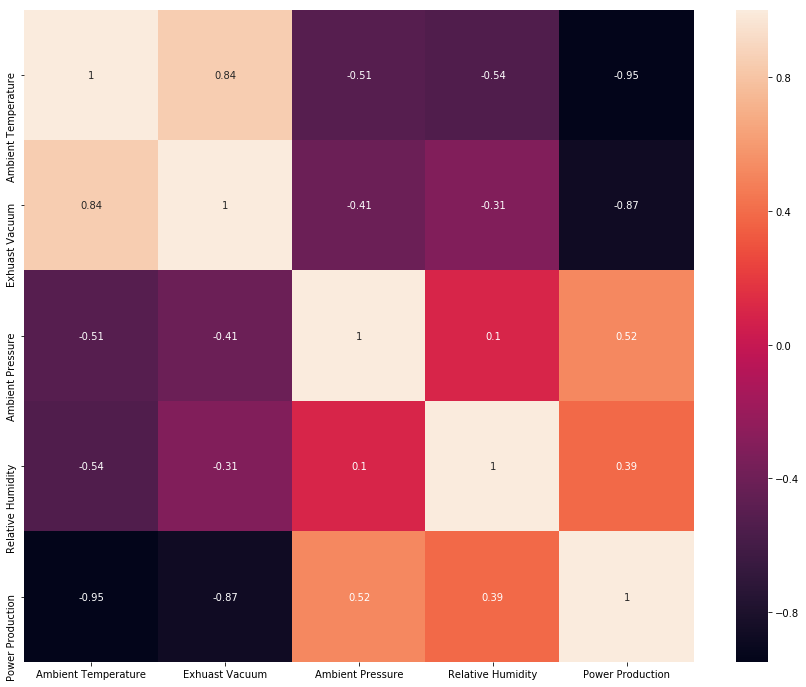

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)


## 5. 모델 선택

In [18]:
X= data.iloc[:,:4]
y=data.iloc[:,4]

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [24]:
from sklearn.model_selection import  cross_val_score

In [28]:
for k in range(1,10):
    knn= KNeighborsRegressor(n_neighbors=k)
    score=cross_val_score(knn, X_train, y_train, cv=5).mean()
    print('k:{},score:{}'.format(k,score))

k:1,score:0.9196647291361492
k:2,score:0.9362917056828721
k:3,score:0.9400954598861879
k:4,score:0.9414635076600473
k:5,score:0.9424986362252898
k:6,score:0.942005697156062
k:7,score:0.9419200636144289
k:8,score:0.9418318421646052
k:9,score:0.9412316870584749


In [31]:
from sklearn import metrics
import numpy as np

In [29]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)  # 스코어는 r스퀘어 (회귀때) 분류때는 정확도 

0.9441519572452848

In [34]:
y_pred=knn.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.023933327899111

선형회귀

In [36]:
lr= LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.928937466129396
0.928582321568567


In [42]:
for a in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]:    
    lasso=Lasso(alpha=a)
    score=cross_val_score(lasso, X_train, y_train, cv=5).mean()
    print('a:{},score:{}'.format(a,score))

a:1e-05,score:0.928342349959354
a:0.0001,score:0.9283423443792117
a:0.001,score:0.9283423615798962
a:0.01,score:0.9283421658383938
a:0.1,score:0.9283404115470342
a:1,score:0.9281194869088326
a:10,score:0.9074495089026957
a:100,score:0.5442595357867255
a:1000,score:-0.000604258871139507


In [43]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.9289375583440382

In [44]:
# 과대적합인 에들은 규제를 시켜줨 

In [45]:
y_pred=lasso.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.539069790856879

In [49]:
for a in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]:    
    ridge=Ridge(alpha=a)
    score=cross_val_score(ridge, X_train, y_train, cv=5).mean()
    print('a:{},score:{}'.format(a,score))

a:1e-05,score:0.9283423499339853
a:0.0001,score:0.9283423499344498
a:0.001,score:0.9283423499390946
a:0.01,score:0.9283423499855384
a:0.1,score:0.9283423504495618
a:1,score:0.9283423550482629
a:10,score:0.9283423968841857
a:100,score:0.9283424021768514
a:1000,score:0.928303116044415


In [53]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.9289374678048651

In [54]:
y_pred=ridge.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.53907268242298